# Part 1 Modeling

## Python Coding and Data Set

- Load in the data file and header file provided 
    - The dataframe does not currently have a header, load in the header file and attach it to the dataframe

In [1]:
# First load in libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import RFE

In [2]:
# Showing where my datafiles are
!ls data

breast-cancer.csv field_names.txt   train.csv


In [3]:
# Load file headers into string
with open('data/field_names.txt') as f: 
    headers = f.read()

# Split the string into list of headers
headerList = headers.split()

In [4]:
print(headerList)

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [5]:
# Load dataset into dataframe
df = pd.read_csv(filepath_or_buffer = 'data/breast-cancer.csv',
                 names= headerList)

In [6]:
# Look at first 3 rows of data
df.head(3)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- Comment on any steps you might take to evaluate or transform the dataset.

Look for Nulls in Each Column. Most machine learning algorthms dont handle nulls well. Seems there are no nulls below, it means we wont have to remove nulls or impute our data (simplifing this coding challenge) 

In [7]:
df.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

Drop Columns that dont have value for our analysis

In [8]:
# Remove 'ID' column
df.drop(columns = 'ID', inplace = True)

I would definitely normalize the feature columns to have a mean of 0 and a standard deviation of 1 for certain algorithms. The reason is because most machine learning algortithms are sensitive to scale. More on this later. 

In [9]:
# Looking at the Distribution of the Dataset in terms of Diagnosis
df['diagnosis'].value_counts(dropna = False)

B    357
M    212
Name: diagnosis, dtype: int64

The section below is so that we can compare test performance with a Null Baseline

In [10]:
length = len(df)

# Number of malignant cases
malignant = len(df[df['diagnosis']=='M'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print('The malignant percentage is: {}%'.format(rate))
print('The benign percentage is: {}%'.format(100 - rate))

The malignant percentage is: 37.2583479789%
The benign percentage is: 62.7416520211%


The dataset is relatively class balanced. This was to check if the classes were very imbalanced

- Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [12]:
df.columns

Index([u'diagnosis', u'radius_mean', u'radius_sd_error', u'radius_worst',
       u'texture_mean', u'texture_sd_error', u'texture_worst',
       u'perimeter_mean', u'perimeter_sd_error', u'perimeter_worst',
       u'area_mean', u'area_sd_error', u'area_worst', u'smoothness_mean',
       u'smoothness_sd_error', u'smoothness_worst', u'compactness_mean',
       u'compactness_sd_error', u'compactness_worst', u'concavity_mean',
       u'concavity_sd_error', u'concavity_worst', u'concave_points_mean',
       u'concave_points_sd_error', u'concave_points_worst', u'symmetry_mean',
       u'symmetry_sd_error', u'symmetry_worst', u'fractal_dimension_mean',
       u'fractal_dimension_sd_error', u'fractal_dimension_worst'],
      dtype='object')

In [19]:
temp = df.groupby(['diagnosis']).agg([np.median, np.mean, np.std]).T.reset_index()
temp[temp['diagnosis'] > 29]

KeyError: 'diagnosis'

In [11]:
# Using a pandas groupby approach to compute. 
df.groupby(['diagnosis'])[['smoothness_mean',
                           'compactness_mean']].agg({'smoothness_mean' : ['mean', 'median'], 'compactness_mean' : ['mean', 'median']})

compactness_mean          smoothness_mean        
                      mean   median            mean  median
diagnosis                                                  
B                 0.021438  0.01631        2.000321  1.8510
M                 0.032281  0.02859        4.323929  3.6795

The tumors can more easily be differentiated by Smoothness. It is important to look at the outliers of both of the columns though so for that we use a boxplot

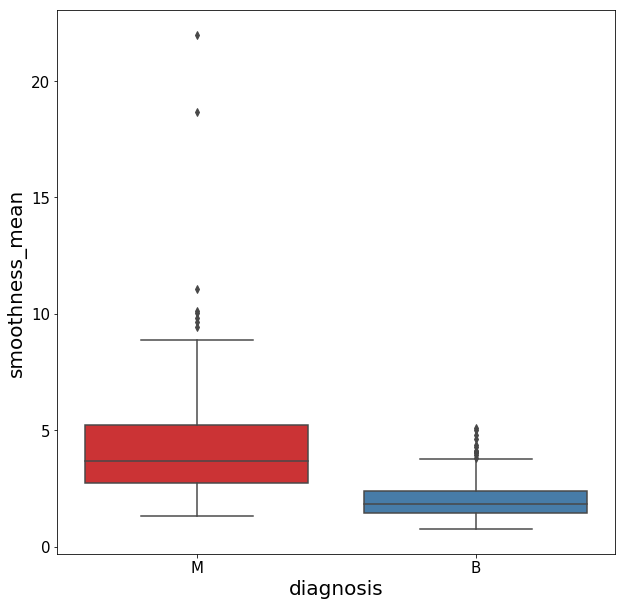

In [12]:
# Data Science is about communicating results so made the boxplot a bit prettier by
# using matplotlab instead of plotting boxplot through pandas
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10));

sns.boxplot(x='diagnosis', y='smoothness_mean', data=df, palette="Set1", ax = axes)

axes.set_xlabel('diagnosis', fontsize = 20);
axes.set_ylabel('smoothness_mean', fontsize = 20)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

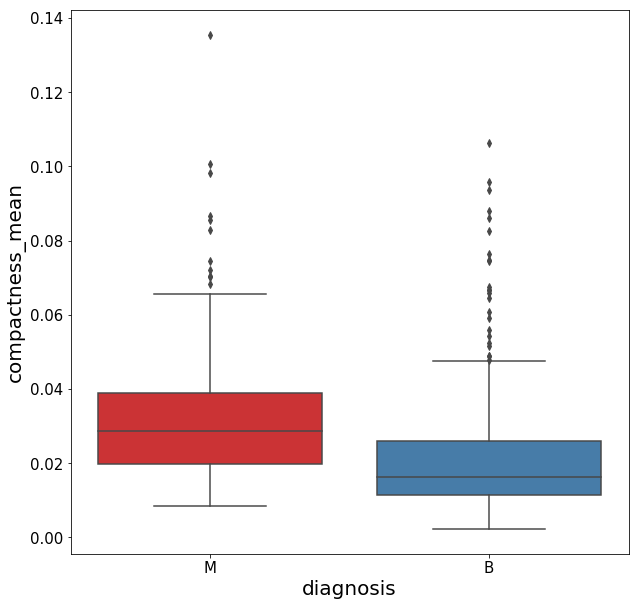

In [13]:
# Data Science is about communicating results so made the boxplot a bit prettier by
# using matplotlab instead of plotting boxplot through pandas
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10));

sns.boxplot(x='diagnosis', y='compactness_mean', data=df, palette="Set1", ax = axes)

axes.set_xlabel('diagnosis', fontsize = 20);
axes.set_ylabel('compactness_mean', fontsize = 20)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

- Write a function to generate bootstrap samples of the data.

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

In [14]:
def bootstrapSamples(x, n = 10):
    """
    Receives a dataframe (x), number of samples requested n (default = 10),
    and returns a dataframe with the samples requested
    """
    
    indexNames = list(x.index)
    
    np.random.choice(indexNames, n, replace=True)
    
    return(x.loc[np.random.choice(indexNames, n, replace=True), :])

In [15]:
# Show what the function is by looking up the docstring
help(bootstrapSamples)

Help on function bootstrapSamples in module __main__:

bootstrapSamples(x, n=10)
    Receives a dataframe (x), number of samples requested n (default = 10),
    and returns a dataframe with the samples requested



In [16]:
bootstrapSamples(df)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
405,B,10.940,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,...,12.400,25.58,82.76,472.4,0.1363,0.1644,0.14120,0.07887,0.2251,0.07732
566,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
349,B,11.950,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,0.2459,...,12.810,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
320,B,10.250,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,...,11.280,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702
94,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,...,18.230,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
432,M,20.180,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,...,22.030,25.07,146.00,1479.0,0.1665,0.2942,0.53080,0.21730,0.3032,0.08075
566,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.1139,0.3094,0.34030,0.14180,0.2218,0.07820
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,...,10.760,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490
527,B,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,...,13.610,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592
525,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,0.1678,...,9.473,18.45,63.30,275.6,0.1641,0.2235,0.17540,0.08512,0.2983,0.10490


Sampling with replacement can be done using inbuilt Pandas methods as well

In [17]:
bootstrapSample = df.sample(frac=0.10, replace=True)

In [18]:
bootstrapSample.head(1)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
300,M,19.53,18.9,129.5,1217.0,0.115,0.1642,0.2197,0.1062,0.1792,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.198,0.2968,0.09929


## Exploratory Analysis

- Identify 2-3 variables that are predictive of a malignant tumor.
    - Display the relationship visually and write 1-2 sentences explaining the relationship.

In [19]:
temp_df = df.copy()
diag_map = {'M':1, 'B':0}
temp_df['diagnosis'] = temp_df['diagnosis'].map(diag_map)

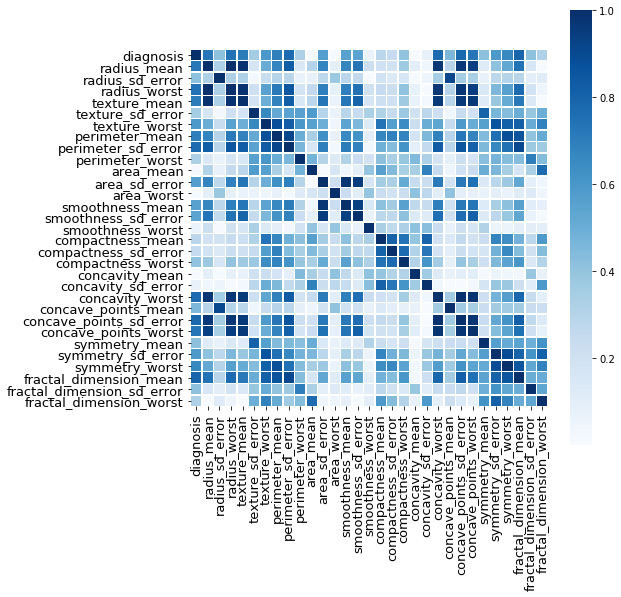

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));


corr = temp_df.corr().abs()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'Blues', 
            linewidths=.5,
            square = True,
            ax = axes);

plt.yticks(fontsize = 13);
plt.xticks(fontsize = 13);

In [21]:
corr.sort_values(by = 'diagnosis', ascending=False).head(9)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
fractal_dimension_mean,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
concave_points_sd_error,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
perimeter_sd_error,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
concavity_worst,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
radius_worst,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
concave_points_worst,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


It is also possible to create a scatter matrix with the features. The red dots correspond to malignant diagnosis and blue to benign. Look how in some cases reds and blues dots occupies different regions of the plots. <b>This might not be useful with so many features </b>

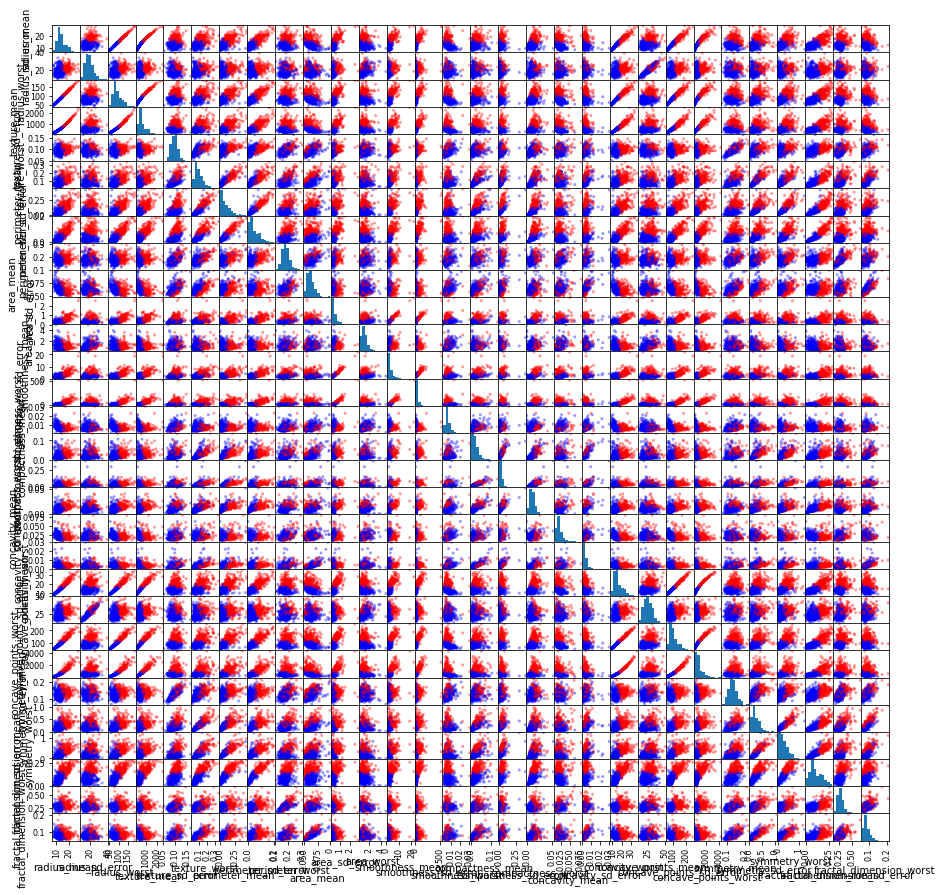

In [22]:
features = ['radius_mean',
            'radius_sd_error',
            'radius_worst',
            'texture_mean',
            'texture_sd_error',
            'texture_worst',
            'perimeter_mean',
            'perimeter_sd_error',
            'perimeter_worst',
            'area_mean',
            'area_sd_error',
            'area_worst',
            'smoothness_mean',
            'smoothness_sd_error',
            'smoothness_worst',
            'compactness_mean',
            'compactness_sd_error',
            'compactness_worst',
            'concavity_mean',
            'concavity_sd_error',
            'concavity_worst',
            'concave_points_mean',
            'concave_points_sd_error',
            'concave_points_worst',
            'symmetry_mean',
            'symmetry_sd_error',
            'symmetry_worst',
            'fractal_dimension_mean',
            'fractal_dimension_sd_error',
            'fractal_dimension_worst']

color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(df[features], c=colors, alpha=0.4, figsize=((15,15)));

We can also see how the malignant or benign tumors cells can have (or not) different values for the features plotting the distribution of each type of diagnosis for each of the mean features.

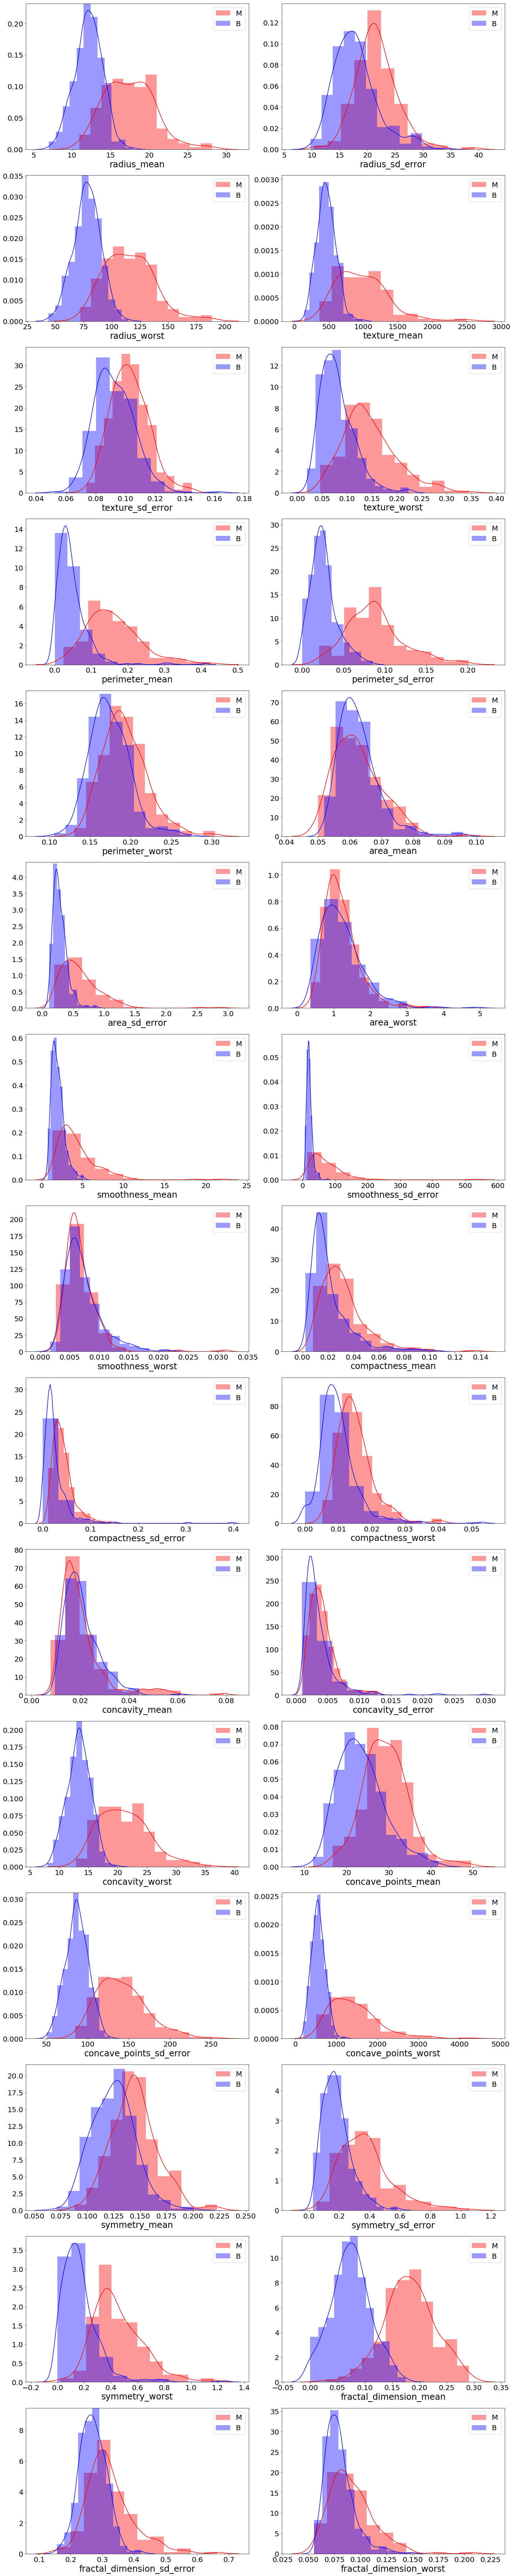

In [23]:
bins = 12
plt.figure(figsize=(20, 100))
for i, feature in enumerate(features):
    rows = int(len(features)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[df['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(df[df['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    # Changing default seaborn/matplotlib to be more readable
    plt.xlabel(feature, fontsize = 24)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(loc='upper right', fontsize = 20)

plt.tight_layout()

Still another form of doing this could be using box plots, which is done below.

In [24]:
## Need to make the boxplots below pretty

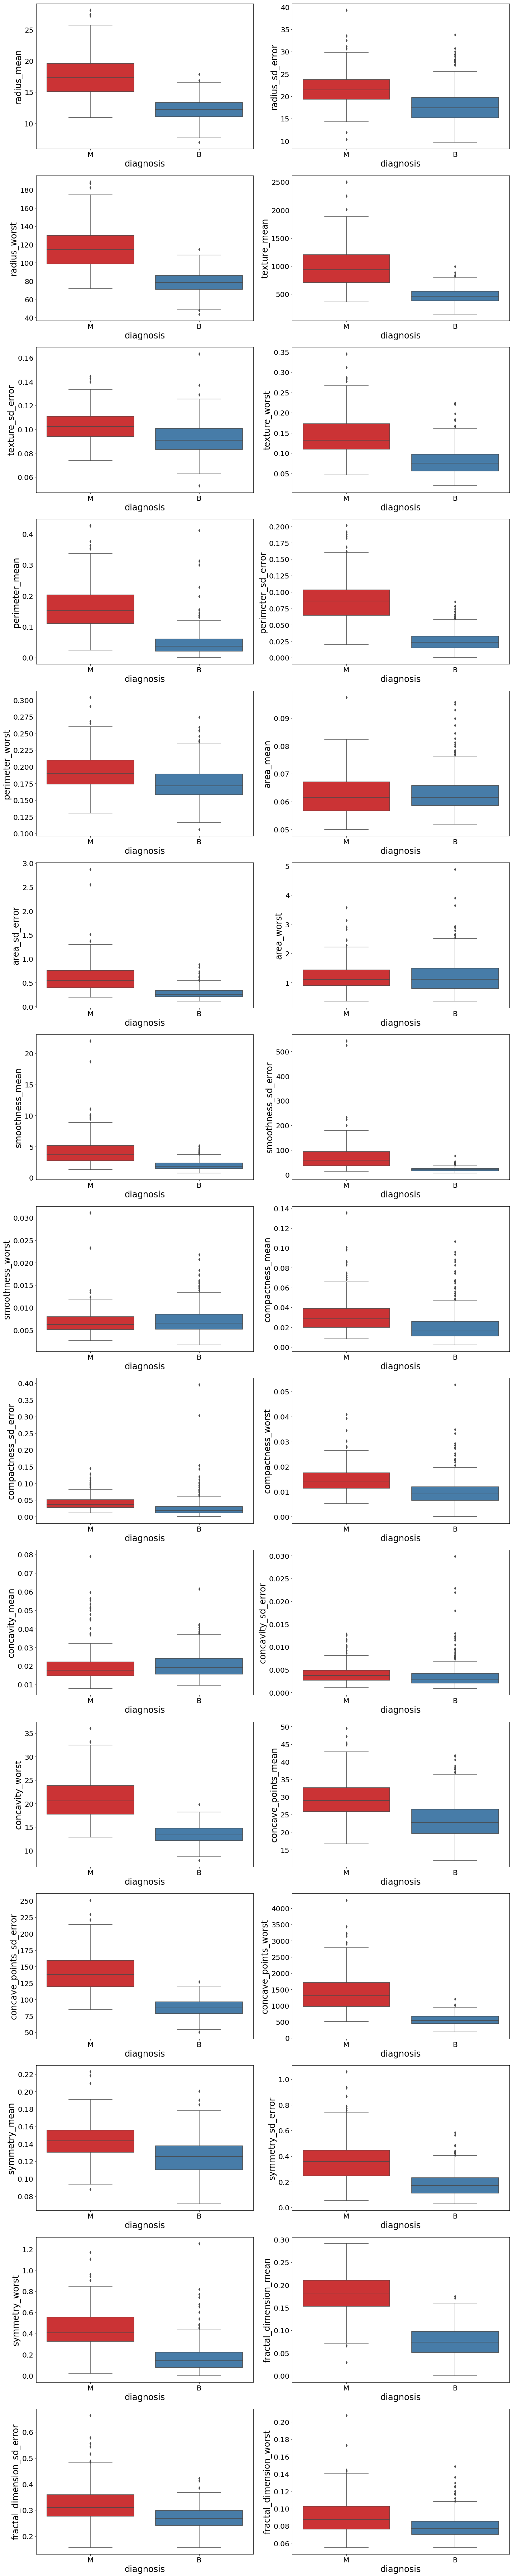

In [25]:
plt.figure(figsize=(20,100))
for i, feature in enumerate(features):
    rows = int(len(features)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")
    
    # Changing default seaborn/matplotlib to be more readable
    plt.xlabel('diagnosis', fontsize = 24)
    plt.ylabel(feature, fontsize = 24)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

plt.tight_layout()

As we saw above, some of the features can have, most of the times, values that will fall in some range depending on the diagnosis been malignant or benign. We will select those features to use in the next section.

### Choosing Features based on Visuals Above

Let's choose <b>'radius_mean', 'radius_worst', 'texture_mean', 'texture_worst', 'perimeter_mean', 'smoothness_mean', 'concave_points_worst' based on the visuals and correlation dataframe </b>

This may not be the best way to do things, but very clear way to show students.

## Modeling

- Build a model to predict the malignant tumors.

In this section we will test and analyze machine learning algorithms for classification in order to identify if the tumor is malignant or benign based on the cell features. For this we will use [Scikit-learn](http://scikit-learn.org/stable/) package. The necessary tools will be loaded as needed.

The problem we are dealing with here is a classification problem. To choose the right estimator (algorithm) we used the [flowchart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) found in the Scikit-learn web page.

The algorithms will process only numerical values. For this reason, we will transform the categories M and B into values 1 and 0, respectively.

In [26]:
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

### Split Data into Training and Test Sets
Keep in mind I go over cross validation in the student responses later on

In [27]:
X = df[features]
y = df['diagnosis']

# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

In [28]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [29]:
y_train.shape, y_test.shape

((426,), (143,))

### Standardize the Data

Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the [effects of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

Not going to do this for algorithms that dont need this like decision trees or random forest classifiers as they are not necessary.

In [40]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

    - Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.

### Classification Tree Advantages

- They are easily visualized and interpretable.
- They can be specified as a series of rules, and more closely approximate human decision-making than other models.
- Prediction is fast.
- No feature normalization or scaling typically needed (for example, this is different than PCA and Logistic Regression where you have to scale your features)
- Tends to ignore irrelevant features.
- They are non-parametric (i.e. will outperform linear models if the relationship between features and response is highly non-linear).

### Classification Tree Disadvantages

- They can easily overfit the training data (tuning is required).
- Small variations in the data can result in a completely different tree (high variance).
- They don't tend to work well if the classes are highly unbalanced.
- Decision aren't competitive with the best supervised learning approaches in terms of prediction and accuracy. (random forest work better, but less interpretable than decision tree)

### K-Nearest Neighbors Advantages

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

### K-Nearest Neighbors Disadvantages

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.

    - Identify how you would control for overfitting in each classification technique.

### Controlling Overfitting in Classification Tree

This can be done by tuning the max depth of the tree.

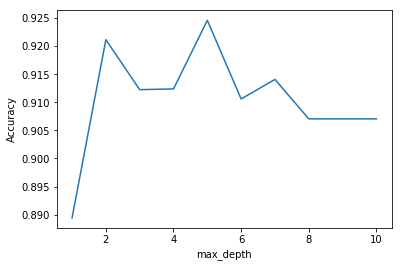

In [31]:
# List of values to try:
max_depth_range = range(1, 11)

# List to store the average RMSE for each value of max_depth:
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy = cross_val_score(clf, X, y, cv=10 )
    accuracy_scores.append(accuracy.mean())

plt.plot(max_depth_range, accuracy_scores);
plt.xlabel('max_depth');
plt.ylabel('Accuracy');

Max depth of 5 is best in this case. 

### KNN Classifier

K large enough to avoid overfitting, but small enough to avoid oversimplifying the distribution.)

In [34]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = range(1, 101)
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [35]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,testing error,training error
K,,
100,0.048951,0.627417
99,0.048951,0.627417
98,0.048951,0.627417
97,0.048951,0.627417
96,0.048951,0.627417


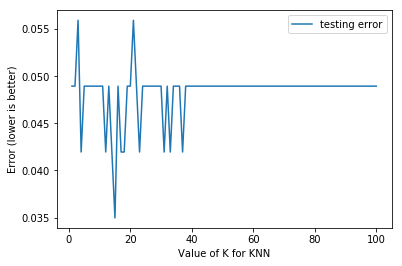

In [36]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [37]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,testing error,training error
K,,
15,0.034965,0.627417
31,0.041958,0.627417
4,0.041958,0.627417
33,0.041958,0.627417
37,0.041958,0.627417


In [38]:
# Alternative method:
min(zip(testing_error, k_range))

(0.034965034965035, 15)

    - Evaluate the performance of each model.

### Classification Tree

In [32]:
# max_depth=5 was best, so fit a tree using that parameter.
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [33]:
clf.score(X_test, y_test)

0.9370629370629371

### KNN Classifier

In [42]:
import numpy as np

# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=15)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test) )

0.965034965034965


This may appear to be impressive, but it isn't scalable and it comes at the cost of having to standardize our data

    - In each model, identify the most important predictive variables and explain how you identified them.

### Classification Tree
The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

In [34]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
temp = pd.DataFrame({'feature':list(X.columns), 'importance':clf.feature_importances_})

In [35]:
# The top 5 variables are below
temp.sort_values(by = 'importance', ascending=False).head(5)

,feature,importance
7,perimeter_sd_error,0.719113
23,concave_points_worst,0.116915
21,concave_points_mean,0.053462
26,symmetry_worst,0.035381
10,area_sd_error,0.020025


### KNN Classifier

If more time, I would do recursive feature elimination, but there is not a good way to do it with sklearn api. 

## Explanation

- To Technical Audiences

    - Explain the limitations of your analysis and identify possible further steps you could take.

My classifiers aren't as accurate as other models as both decision tree and knn are not known to be the most accurate of classifiers. Additionally, if there was more time, I would try a random forest classifier as they typically are more accurate than decision tree and knn. 

- To Non-Technical Audiences

    - Write a short summary of your analysis, explaining how your model works and how it performs.

See the decision tree image below 

### KNN Classifier

1. Compute a distance value between the item to be classified and every item in the training data-set
2. Pick the k closest data points (the items with the k lowest distances)
3. Conduct a "majority vote" among those data points - the dominating classification in that pool is decided as the final classification

    - Briefly explain the factors that contributed to malignant vs benign tumor identification.

### Classification Tree 

Features higher up in the tree like perimeter_sd_error contributed the most to identification

In [37]:
tree.export_graphviz(clf, out_file="decisionTree.dot", feature_names=list(X.columns), class_names=['Benign', 'Malignant'], filled = True, impurity = False)

In [38]:
!dot -Tpng decisionTree.dot -o decisionTree.png

![](decisionTree.png)

### KNN Classifier

Not easy to do with the sklearn api. 

# Part 2 Student 1

1- Code
    - Feel free to comment on style, library usage, or other improvements.

In [52]:
import pandas as pd
import numpy as np


## TO DO 
# Check the original import statement for Linear Regression
# from sklearn import LinearRegression

# Correction
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score

## TO DO 
# Check if d is a typo
# Load data
#d = pd.read_csv('data/train.csv')

# Load data
data = pd.read_csv('data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model

# To DO Fix unnecessary import statement
# from sklearn.cross_validation import cross_val_score

# Not Needed
# from sklearn.cross_validation import train_test_split

## TO DO
# Review Concept from Cross Validation Lecture
# See Conceptual Understanding in next section for explanation
#scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')


scores = cross_val_score(model, x2, x1, cv=2, scoring='mean_absolute_error')
print(scores.mean())

/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-11733.827883047155


/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


## Suggested Code Improvements

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

## TO DO 
# Check if d is a typo
# Load data
#d = pd.read_csv('data/train.csv')

# Load data
data = pd.read_csv('data/train.csv')


# Setup data for prediction

X = pd.get_dummies(data.ContractType)

y = data.SalaryNormalized

# Setup model
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10, scoring='mean_absolute_error')
print(scores.mean())

-11710.926278050936


/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be remo

2- Methodology
    - Feel free to comment on the student's data setup, modeling methodology, and model evaluation.

### Tip 1
When copying code, make sure to connect the pieces of the copied code. The student did not know how to import LinearRegression. When they loaded the dataset into memory (pd.read_csv), they had difficulty working setting up data for prediction because they didn't understand that to use a variable it has to be defined. 

## Tip 2
All import statements should be at the top of a notebook. This is also to remove duplicate code. This was probably due to the student copying code from various portions of the curriculum. This lead to duplicate imports. 

## Tip 3
Naming of variables is not logical. x1 and x2 are not optimal names for variables Convention is X for features and y for target. This could lead to additional unnecessary confusion. 

## Tip 4
The concept of cross validation was not understood. See Conceptual Understanding to how it works. 

## Tip 5
This would be an excellent opportunity to talk about deprecated vs obsolete code as depending on pandas sklearn version, the code in the future wont run. 

3- Conceptual Understanding
Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

Here is how K-Folds Cross Validation (typically k = 10) works. 

1. Split data into a number of different pieces (folds)
2. Train using k-1 folds for training and a different fold for testing
3. Average model against each of those iterations
4. Choose our model and TEST it against the final fold
5. Average all test accuracies to get the estimated out of sample accuracy. 

I should note that in the real world, I would draw this out on a white board or on Zoom or refer to course notes if they have an applicable image since some are visual learners. 

# Part 2 Student 2

1- Code
    - Feel free to comment on style, library usage, or other improvements.

### Original Code

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

-11822.140231295069


/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/michaelgalarnyk/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be remo

### Tip 1
For learners of Python I would advise splitting the code into multiple cells since it leads to harder to trace errors and such (optional advice). It also defeats the purpose of a notebook to run everything in one cell. 

### Tip 2 
Use the non deprecated module. This is good practice to get into. Excellent opportunity to talk about environment management (if they want to have their old code work in the future). If they want this to run as is in the future, they could do <b>from sklearn.model_selection import cross_validate </b>

### Tip 3
Student only used effectly one column of information and one hot encoded it. There are other features that could have been transformed to make a better model. There needs to be more exploratory analysis

3- Conceptual Understanding
Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

The code seems to be very plug and chug and gives no understanding of hyperparameter tuning as well. They only made a default instance of a model. 